In [1]:
!nvidia-smi

Wed Mar 10 12:11:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.layers import Flatten,Dense
from glob import glob

In [3]:
image_size=[224,224]

train_path="/content/drive/MyDrive/Dataset/cotton disease/data/train"
test_path="/content/drive/MyDrive/Dataset/cotton disease/data/test"

In [4]:
resnet=ResNet50(include_top=False,input_shape=image_size+[3])
resnet

In [5]:
for layers in resnet.layers:
  layers.trainable=False

In [6]:
categories=glob("/content/drive/MyDrive/Dataset/cotton disease/data/train/*")

In [7]:
x=Flatten()(resnet.output)
prediction=Dense(len(categories),activation='softmax')(x)

In [8]:
model=Model(inputs=resnet.input,outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [10]:
train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/25)

In [11]:
train_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/cotton disease/data/train',
                                             target_size=[224,224],
                                             batch_size=16)
test_data=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/cotton disease/data/test',
                                           target_size=[224,224],
                                           batch_size=16)

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [12]:
fit=model.fit(train_data,validation_data=test_data,epochs=20,
          steps_per_epoch=len(train_data),
          validation_steps=len(test_data))

Epoch 1/20
122/122 [==============================] - 505s 4s/step - loss: 3.5513 - accuracy: 0.3431 - val_loss: 20.5112 - val_accuracy: 0.1667
Epoch 2/20
122/122 [==============================] - 36s 297ms/step - loss: 1.1512 - accuracy: 0.5542 - val_loss: 21.5297 - val_accuracy: 0.0556
Epoch 3/20
122/122 [==============================] - 36s 297ms/step - loss: 1.1806 - accuracy: 0.6115 - val_loss: 25.7527 - val_accuracy: 0.1667
Epoch 4/20
122/122 [==============================] - 36s 298ms/step - loss: 0.9873 - accuracy: 0.6224 - val_loss: 31.6721 - val_accuracy: 0.0556
Epoch 5/20
122/122 [==============================] - 36s 298ms/step - loss: 1.0549 - accuracy: 0.6436 - val_loss: 38.4497 - val_accuracy: 0.1111
Epoch 6/20
122/122 [==============================] - 36s 296ms/step - loss: 1.2352 - accuracy: 0.6381 - val_loss: 36.6330 - val_accuracy: 0.1111
Epoch 7/20
122/122 [==============================] - 36s 298ms/step - loss: 1.0642 - accuracy: 0.6352 - val_loss: 43.3672 - v

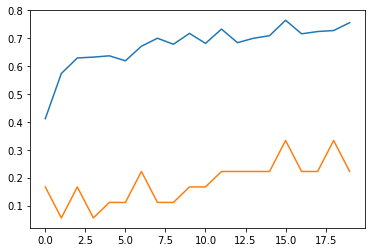

In [13]:
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])

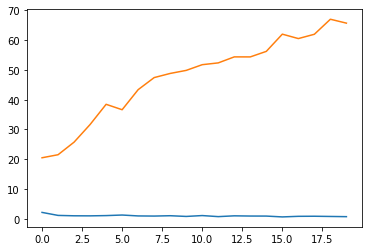

In [14]:
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])

In [15]:
model.save('resnet50.h5')